In [33]:
# Als je `import clusterizer` typt, dan zoekt Python naar mappen en .py-bestanden met die naam.
# De plekken waar python gaat zoeken staan in de lijst `sys.path`.
# Omdat we nu in SCG-analyse/notebooks zitten, moeten we de bovenliggende map (`SCG-analyse`)
# toevoegen aan de lijst van zoekplekken.
import sys
if ".." not in sys.path:
    sys.path.append("..")

# Hiermee wordt de clusterizer module herladen wanneer een bestand ervan verandert
# (handig als je aan de module aan het werken bent).
# Als je dit niet doet, wordt de code (zoals circuit.py, plot.py, etc) alleen geladen wanneer
# je `import clusterizer` typt. 
%load_ext autoreload
%autoreload 2


import clusterizer

import matplotlib.pyplot as plt

# Nodig om een np.datetime64 tijdstip (zoals in de partial_discharges DataFrame) 
# als ascoordinaat te gebruiken.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Hogere DPI voor plotjes (is mooi)
%config InlineBackend.figure_format = 'retina'
# Standaard grootte van plotjes in inches
plt.rcParams['figure.figsize'] = [8, 5]

import pandas as pd
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Eerste submodule: `clusterizer.globals`
Hierin staan maar twee interessante dingen:

De map waarin wordt gezocht naar `.csv`-bestanden. (Wordt automatisch gevonden.)

In [4]:
clusterizer.globals.datadir

WindowsPath('C:/dev/py/SCG-analyse/data/origineel')

Lijst met circuitnummers waarvan de partial discharges zijn gegeven.

In [ ]:
clusterizer.globals.available_circuits

# Tweede submodule: `clusterizer.circuit`
Hierin staat een klasse, `MergedCircuit`. Dit is een soort verzamelplek voor alle data (pd, warnings, cable config, kabellengte, etc) van een enkel circuit. 

In [6]:
circuitje=MergedCircuit(2063)
circuitje.build()

In [11]:
circuitje.pd.head()

,Date/time (UTC),Location in meters (m),Charge (picocoulomb)
0,2017-08-21 14:39:00,NaN,NaN
1,2017-08-21 14:40:00,NaN,NaN
2,2017-08-21 14:41:00,NaN,NaN
3,2017-08-21 14:42:00,NaN,NaN
4,2017-08-21 14:43:00,NaN,NaN


In [12]:
circuitje.warning

,Location in meters (m),SCG warning level (1 to 3 or Noise),Start Date/time (UTC),End Date/time (UTC)
0,349,3,2018-02-26 22:40:58,2018-05-27 08:45:43
1,604,2,2018-02-05 00:03:25,2018-02-23 16:08:12
2,604,3,2017-12-30 19:48:43,2018-02-05 00:03:25


In [14]:
circuitje.cableconfig.head()

,Component type,Length (m),Cumulative length (m)
0,RMU,NaN,0.0
1,Termination (unknown),NaN,0.0
2,"Cable (PILC, 3 cores, belted)",12.0,12.0
3,Joint (resin),NaN,12.0
4,"Cable (PILC, 3 cores, belted)",16.0,28.0


In [15]:
circuitje.circuitlength

2299.0

In [17]:
# Per tijdstip of er een PD was op dat tijdstip
circuitje.pd_occured.head()

0    False
1    False
2    False
3    False
4    False
Name: Location in meters (m), dtype: bool

# Nog een submodule: `clusterizer.cluster`
Hierin staat eigenlijk alleen een simpele klasse:

In [20]:
cool = clusterizer.cluster.Cluster(location_range=(20.0, 85.1))
print(cool)

20m to 85m

In [43]:
cooler = clusterizer.cluster.Cluster(location_range=(120.0, 185.1), time_range=(np.datetime64('2018-03-22T19:00'), np.datetime64('2018-09-22T19:00')))
print(cooler)

120m to 185m; 2018-03-22T19:00 until 2018-09-22T19:00


# Coole submodule: `clusterizer.plot`
Plaatjes vullen gaatjes:

<IPython.core.display.Javascript object>


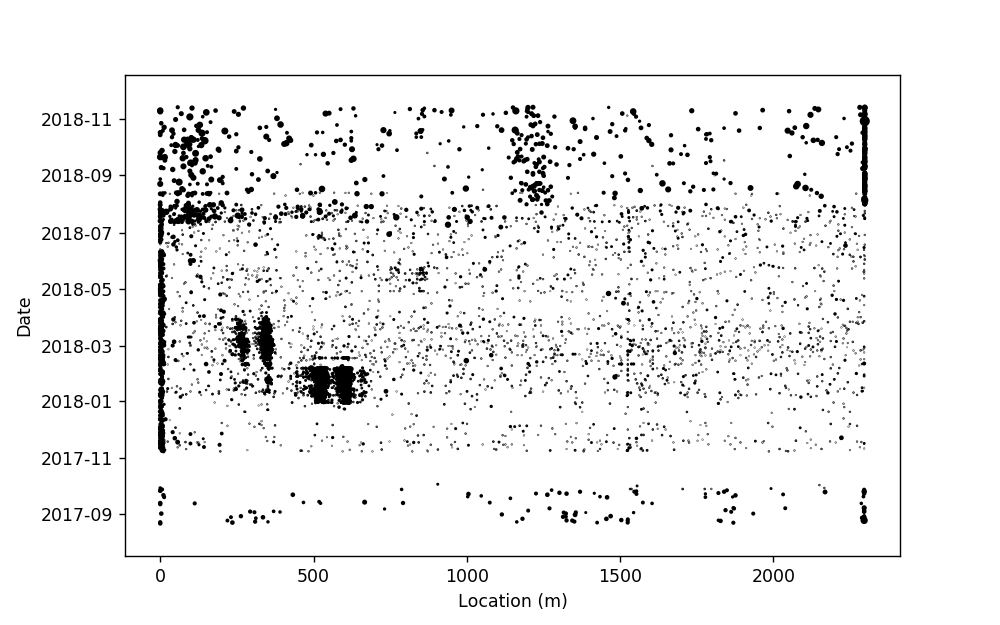

In [35]:
# Hiermee worden matplotlib plotjes interactief (zoomen enz)
%matplotlib notebook
clusterizer.plot.draw_location_time_scatter(circuitje)

Je kan zelf `axes` meegeven om de plot op te maken:

<IPython.core.display.Javascript object>


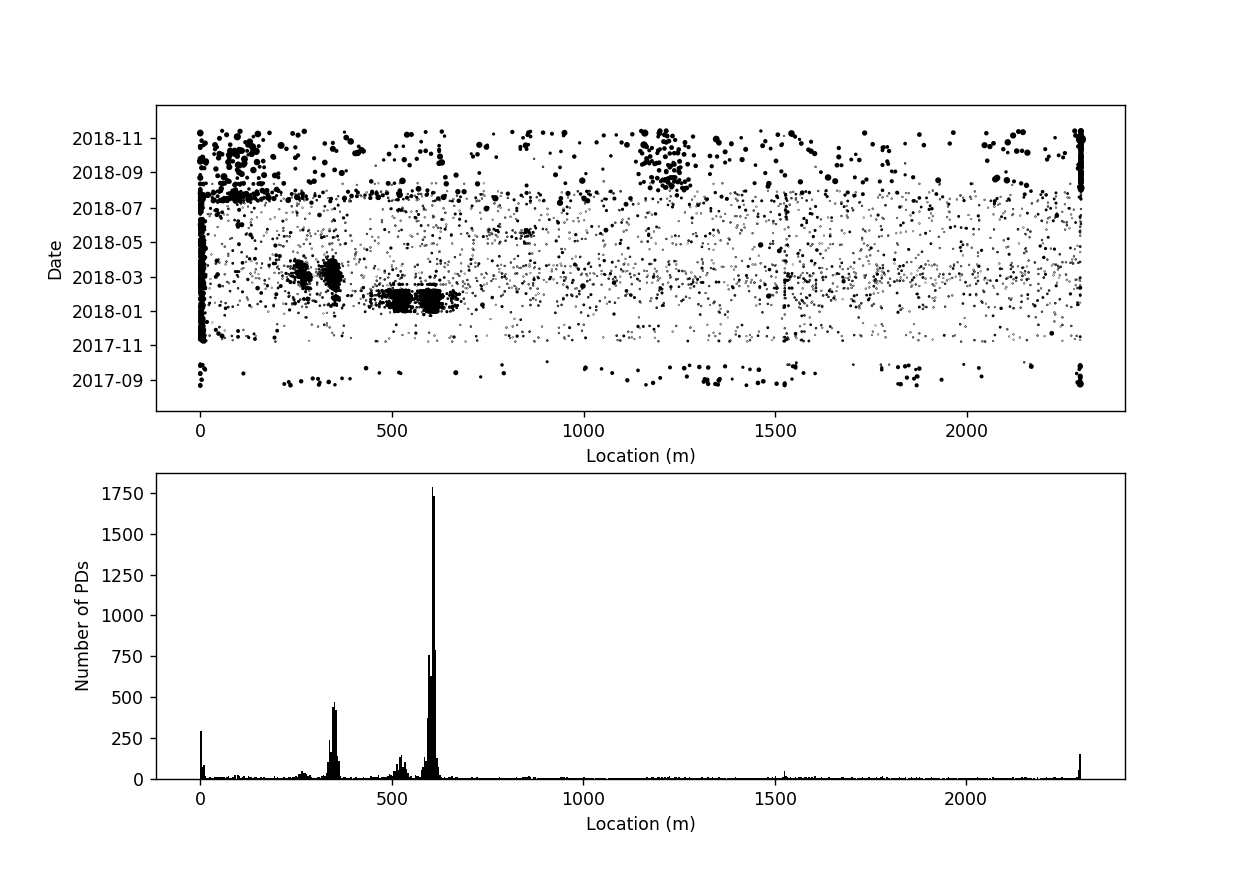

In [37]:
fig, both_axes = plt.subplots(2,1, figsize=(10,7))

clusterizer.plot.draw_location_time_scatter(circuitje, ax=both_axes[0])
bakjes_hoogte = clusterizer.plot.draw_location_hist(circuitje, ax=both_axes[1])
# Als je de nieuwste clusterizer-versie hebt wordt bakjes_hoogte niet meer gegeven (ik vond dat eerst een slim idee):
#clusterizer.plot.draw_location_hist(circuitje, ax=both_axes[1])



Je kan de `axes` hergebruiken: meerdere dingen op dezelfde `axes` plotten. Hierom hebben alle functies in `clusterizer.plot` een argument `ax`: hierin kan je een `axes` geven waarop getekend moet worden.

<IPython.core.display.Javascript object>


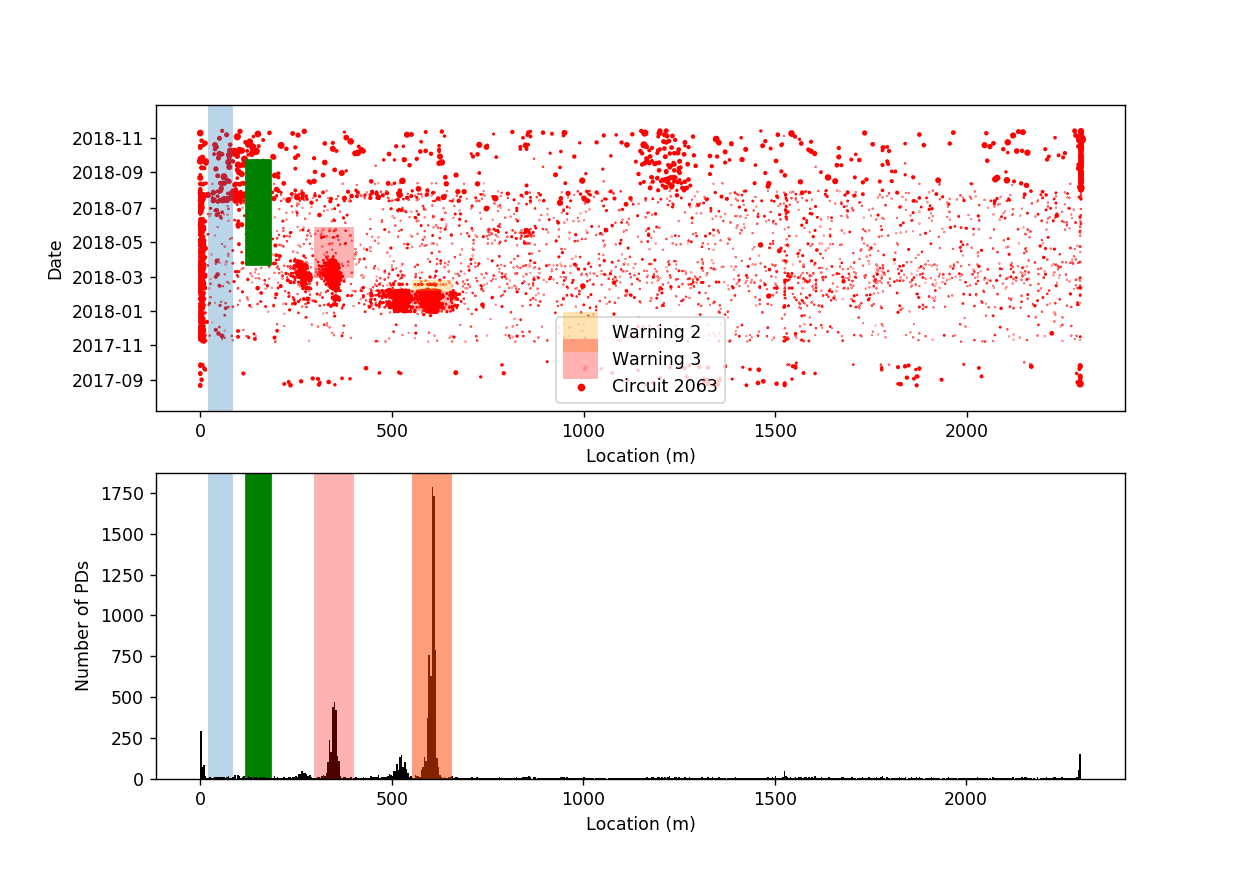

In [51]:
fig, both_axes = plt.subplots(2,1, figsize=(10,7))

clusterizer.plot.draw_location_time_scatter(circuitje, ax=both_axes[0], dot_colors="red")
bakjes_hoogte = clusterizer.plot.draw_location_hist(circuitje, ax=both_axes[1])
# Als je de nieuwste clusterizer-versie hebt wordt bakjes_hoogte niet meer gegeven (ik vond dat eerst een slim idee):
#clusterizer.plot.draw_location_hist(circuitje, ax=both_axes[1])

clusterizer.plot.overlay_cluster(cool, ax=both_axes[0])
clusterizer.plot.overlay_cluster(cool, ax=both_axes[1])
clusterizer.plot.overlay_cluster(cooler, ax=both_axes[0], color="green", opacity=1)
clusterizer.plot.overlay_cluster(cooler, ax=both_axes[1], color="green", opacity=1)

clusterizer.plot.overlay_warnings(circuitje, ax=both_axes[0])
clusterizer.plot.overlay_warnings(circuitje, ax=both_axes[1])

both_axes[0].legend()

# Uiteindelijk belangrijkste submodule: `clusterizer.algorithms`

In [50]:
clusters, bins, bin_counts, rate = clusterizer.algorithms.clusterize_poisson(circuitje)
clusters

{0m to 12m, 256m to 288m, 328m to 364m, 492m to 544m, 576m to 628m}

<IPython.core.display.Javascript object>


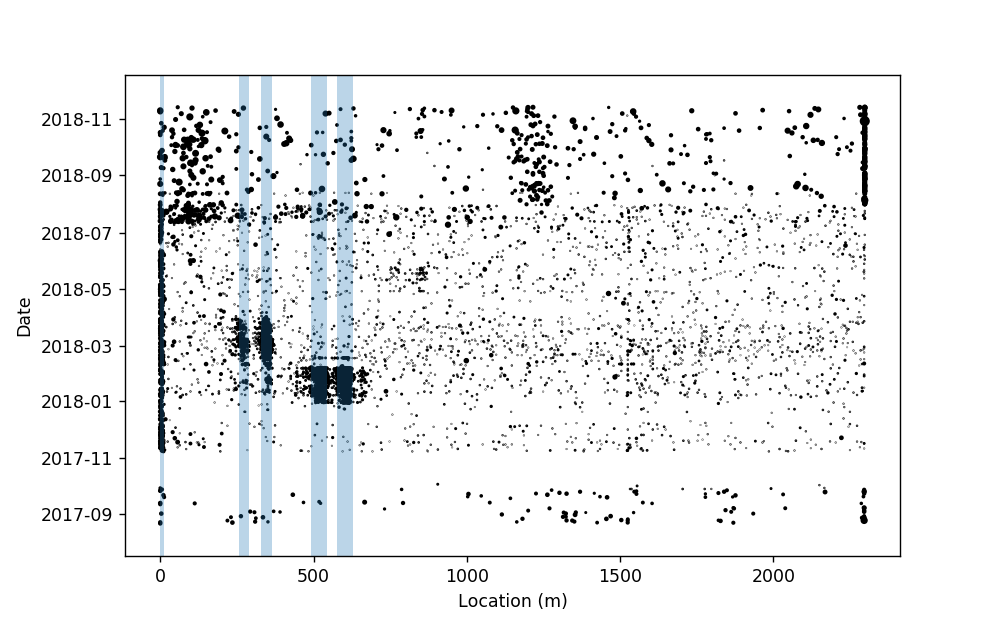

In [49]:
fig,ax = plt.subplots()

clusterizer.plot.draw_location_time_scatter(circuitje, ax=ax)
for c in clusters:
    clusterizer.plot.overlay_cluster(c, ax=ax)
